# **Introduction to Keras and the Sequential API**

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow. It allows for easy and fast prototyping, supports both convolutional and recurrent networks, and runs seamlessly on CPU and GPU.

The Sequential API in Keras is a simple and straightforward way to build models layer-by-layer. It is ideal for building most types of neural networks, especially when the architecture is a plain stack of layers where each layer has exactly one input tensor and one output tensor.

*******************************************************************************************************************************
*******************************************************************************************************************************

This covers the entire workflow of loading data, preprocessing, building and training a model, evaluating the model, and making predictions using the MNIST dataset.

### **1. Import Necessary Libraries**

In [1]:
import numpy as np      # for numerical operations
import tensorflow as tf      # for building and training the neural network
from tensorflow.keras.datasets import mnist      # for loading the MNIST dataset

# Sequential, Dense, Flatten for constructing the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical      # for converting labels to one-hot encoding
import matplotlib.pyplot as plt      # for plotting and visualizing the data and results

print(tf.__version__)


2.15.1


### **2. Load the MNIST Dataset**

**MNIST Dataset:**
The MNIST dataset consists of images of handwritten digits, where each image is labeled with a digit between 0 and 9. Therefore, there are 10 possible classes (one for each digit).

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()        # loads the MNIST dataset

### **3. Preprocess the MNIST Dataset**

In [3]:
# Normalize the images to a range of 0 to 1
# The pixel values of the images are normalized to the range [0, 1] by dividing by 255.0.
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
# 10 represents the number of classes in the MNIST dataset
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Applying one-hot encoding to MNIST:**
The labels are integers from 0 to 9. When you apply to_categorical(y_train, 10) or to_categorical(y_test, 10), you convert each label into a binary vector of length 10. 

**For example:**

The label 0 becomes [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

The label 1 becomes [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

The label 9 becomes [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

This transformation is necessary for training a neural network with categorical cross-entropy loss, as the network will output probabilities for each class, and these probabilities need to be compared to the one-hot encoded true labels.

### **4. Build a Simple Keras DNN Model**

In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input image to a 1D array
    Dense(units=128, activation='relu', name='h1'),  # First hidden layer
    Dense(units=64, activation='relu', name='h2'),  # Second hidden layer
    Dense(units=10, activation='softmax', name='output')  # Output layer
])

Explanation:

+ Sequential creates a linear stack of layers.

+ Flatten layer flattens the 2D input images to 1D arrays.

+ Dense layers are fully connected layers with specified units and activation functions (relu for hidden layers, softmax for the output layer).

### **5. Compile the Model**

In [5]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy', rmse])

Purpose: Configure the learning process by specifying the optimizer, loss function, and evaluation metrics.

Explanation:

+ optimizer='adam' specifies the Adam optimizer.

+ loss='categorical_crossentropy' specifies the categorical cross-entropy loss function.

+ metrics=['accuracy', rmse] specifies the evaluation metrics (accuracy and custom RMSE function).

### **6. Train the Model**

In [6]:
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./mnist_logs')])

Epoch 1/10


1500/1500 [==============================] - 6s 4ms/step - loss: 0.2642 - accuracy: 0.9221 - rmse: 0.1003 - val_loss: 0.1346 - val_accuracy: 0.9605 - val_rmse: 0.0688
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1127 - accuracy: 0.9660 - rmse: 0.0656 - val_loss: 0.1021 - val_accuracy: 0.9706 - val_rmse: 0.0575
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0778 - accuracy: 0.9755 - rmse: 0.0525 - val_loss: 0.0938 - val_accuracy: 0.9731 - val_rmse: 0.0536
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0590 - accuracy: 0.9813 - rmse: 0.0448 - val_loss: 0.1330 - val_accuracy: 0.9641 - val_rmse: 0.0649
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0459 - accuracy: 0.9850 - rmse: 0.0375 - val_loss: 0.0949 - val_accuracy: 0.9746 - val_rmse: 0.0510
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0376 - accuracy: 0.9879 - rmse

Explanation:

+ x_train and y_train are the training data and labels.

+ epochs=10 specifies the number of epochs (complete passes through the training data).

+ batch_size=32 specifies the number of samples per gradient update.

+ validation_split=0.2 specifies the fraction of training data to be used as validation data.

+ callbacks=[TensorBoard(log_dir='./mnist_logs')] specifies the TensorBoard callback to log training progress. In short, it gives logging details

### **7. Evaluate the Model**

In [7]:
model.summary() # provides a detailed model summary, including the layers, output shapes, and the number of parameters.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 h1 (Dense)                  (None, 128)               100480    
                                                                 
 h2 (Dense)                  (None, 64)                8256      
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **8. Plot Training and Validation Metrics**

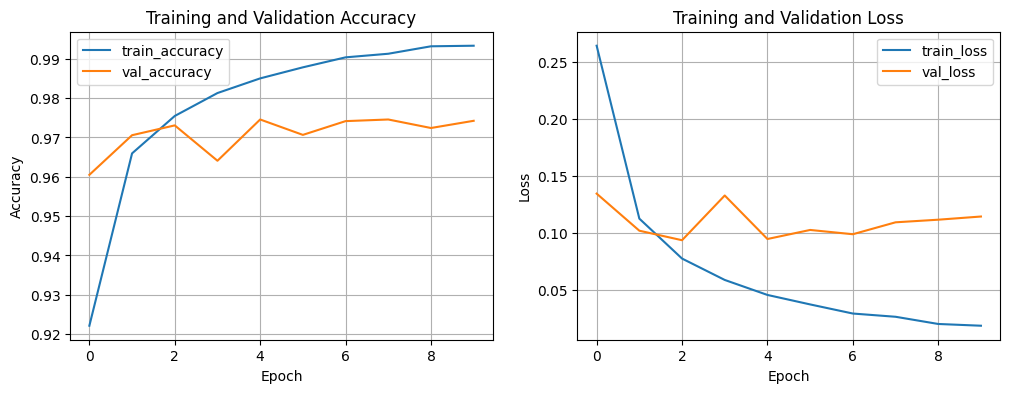

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)    # creates the first subplot for accuracy
# history.history contains the training history recorded during fit.
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)    # creates the second subplot for accuracy
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.title('Training and Validation Loss')

plt.show()

In [9]:
# Evaluate the model on the test data
test_loss, test_accuracy, test_rmse = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.1080 - accuracy: 0.9752 - rmse: 0.0453
Test accuracy: 97.52%


### **9. Make Predictions with the Model**

1/1 [==============================] - 0s 88ms/step
Predicted labels:  [7 2 1 0 4]


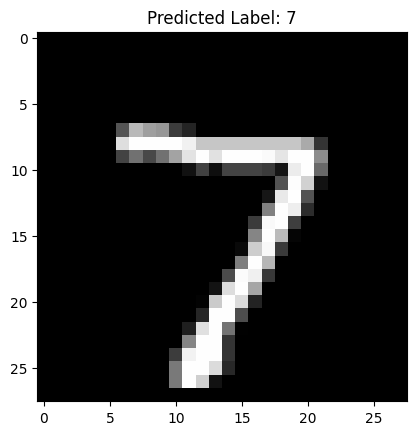

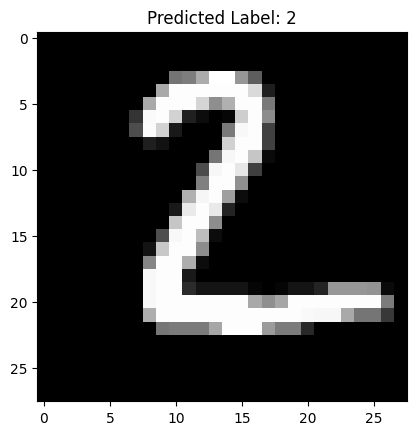

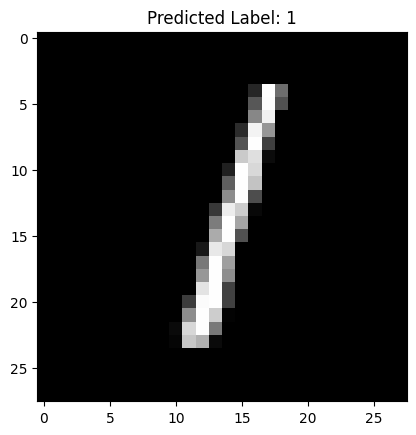

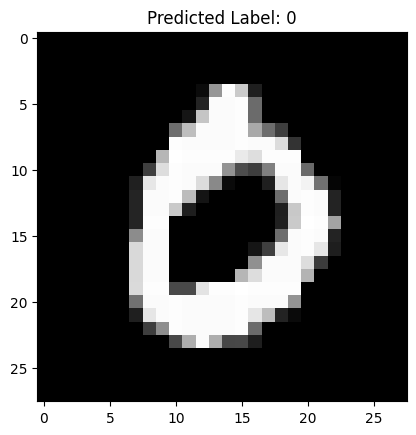

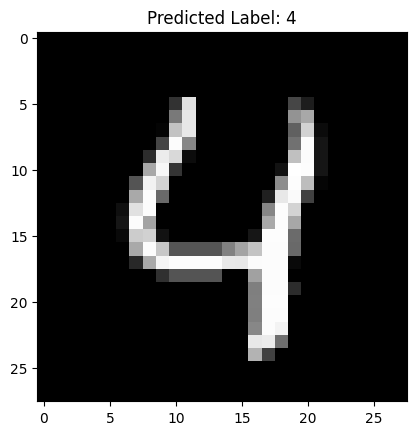

In [10]:
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels: ", predicted_labels)

# Display the first 5 test images and their predicted labels
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted Label: {predicted_labels[i]}")
    plt.show()

Purpose: Use the trained model to make predictions on the test data and display some results.

Explanation:

+ model.predict(x_test[:5]) makes predictions for the first 5 test images.

+ np.argmax(predictions, axis=1) gets the index of the highest probability class for each prediction.

+ plt.imshow(x_test[i], cmap='gray') displays the test images in grayscale.

+ plt.title(f"Predicted Label: {predicted_labels[i]}") sets the title of each plot to the predicted label.

